In [ ]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import init_lattice as lat
import MH_algorithm as MH
import Wolff_algorithm as W
import time
import autocorrelation_functions as acf
importlib.reload(MH)
importlib.reload(W)
importlib.reload(lat)
importlib.reload(acf)

# Monte Carlo and cluster algorithms for the 2D Ising Model

## Abstract - TO FINISH

The Ising model for ferromagnets is a common and well researched topic in statistical mechanics both computationally and analytically. Many different algorithms with differing complexities and strengths have been devised to simulate the behaviour of this model. In this project, the behaviour and complexity of the Metropolis-Hastings and Wolff Cluster algorithms applied to this context was investigated. This report focuses particularly on the simulated behaviour at and around the critical temperature $T_c$ of the continuous phase transition, where these algorithms differ. The efficiency of the algorithms is also calculated by means of the dynamic critical exponent.

The Wolff algorithm and Metropolis-Hastings algorithm were studied to assess their efficiency and performance in simulating the 2 dimensional Ising model. An implementation of each was written in python and their behaviour around the continuous phase transtion investigated. Both simulated the large and small temperature limits successfully. The critical temperatures measured were $2.63 \pm 0.08$ and $2.30 \pm 0.08$ for the Wolff and Metropolis-Hasstings algorithms respectively. The Wolff measurement is consistent with previously published values. However, the measurement from the implementation of the Metropolis-Hastings are not consistent with previously published values. The Wolff algorithm displayed shorter autocorrelation times than the Metropolis-Hastings algorithm, showing its lesser vulnerability to the phenomenon of critical slowing down. Attempts to measure the dynamic exponent for both algorithms were far from literature values and neither regression fit was significant. Dependence of time to execute a single iteration on coupling strength and lattice size were also investigated. Wolff had longer single iteration exectution times for all measured conditions, and Metropolis-Hastings execution time displayed no dependence on either condition.

## Introduction

In this report, the Metropolis-Hastings and Wolff algorithms are implmemented and their performance and results are investigated. Of particular focus is the issue of *critical slowing down*. This is a phenomena that occurs near to the continuous phase transition, where both algorithm take significantly larger numbers of iterations to produce independent samples of the measurement at hand. The performance of these algorithms, in terms of dynamic exponent and agreement to the analytic Onsager solution is explored below.

## Theory

### 1 - Background Theory

The Ising model considers individual spins, $\sigma_i$, arranged in space. For the purposes of this report, spins will be placed upon an $L\times L$ square lattice. This model assumes that these individual spins may be directed only up or down, i.e. $\sigma_i = \pm 1$, and that each spin interacts with only its nearest neighbours on the lattice. The total energy of the system is then:

$ E = -J \sum_i \sum_j \sigma_i \sigma_j - \mu H \sum_i \sigma_i $ (1) [1]

where for each spin $i$ its nearest neighbours, $j$, are summed over. Additionally, $J$ is the ferromagnetic coupling, $\mu$ is the spin's magnetic moment and $H$ is the external magnetic field. In this report, we will be considering the zero external magnetic field regime.

Typical observables of interest for this system are the magnetism,

$ M  = \frac{1}{N} \sum_{i = 1}^N \sigma_i $ (2)

# ADD OTHER OBSERVABLES

or, for ensemble systems, the expected total magnetism:

$ \mathbb{E}(M) = \sum_{\sigma states} M(\sigma)p(\sigma)$ (3)

with $p(\sigma)$ being the probabilty density for a specific $\sigma$ state. From statistical mechanics, recall that for such a system,

$ p(\sigma) = \frac{e^{- \beta E}}{Z} $ (4)

Where $Z = \sum_{states} e^{-\beta E_{state}}$ is the partition function, and $\beta = \frac{1}{k_b T}$. For convenience, $\beta = 1$ throughout this report.

However, for a general Ising system, whilst $Z$ is constant it is not feasibly calculable. To illustrate this consider an $N \times N$ lattice of spins. To compute $Z$, we must (at worst) sum up $2^N$ terms for each possible lattice configuration; this sum quickly becomes astronomic in scale. Hence, we must approach this problem in a manner that depends only on relative likelihood, not absolute probability.

In some limiting cases, the behaviour of this system is analytically solvable, for example the Onsager solution for 2 dimensions with no external field, this is typically tedious, or infeasibly complex. This is the motivation for studying this system with computational methods. However, comparison of computational methods to the establsihed Onsager solution is a convenient sanity check for the accuracy and precision.

### The Onsager Solution

In 1944, Onsager found an analytical expression for the free energy and magnetism of the 2D square lattice Ising model in the limit of $L \rightarrow \infty$ and with no eternal magnetic field. Below is the solution for the magnetisation In the case relevant to this report, with isotropic couping:

$\mathbb{E}(M) = (1 - (sinh(2 \beta J)^{-4}))^{\frac{1}{8}} $ for $ T \le T_c $

$\mathbb{E}(M) = 0$ for $ T > T_c $ (5)

The non zero solution clearly is only defined if $sinh(2 \beta J) \ge 1$. This defines our *critical temperature*, $T_c = \frac{2 J}{ln(1 + \sqrt{2})} \approx 2.27J$ . There is a continuous phase transition at $T = T_c$ at which the spins rapidly transition from ordered to disordered, leading to the order parameter, $\vert M \vert$, changing abruptly. Figure 1 plots this solution.

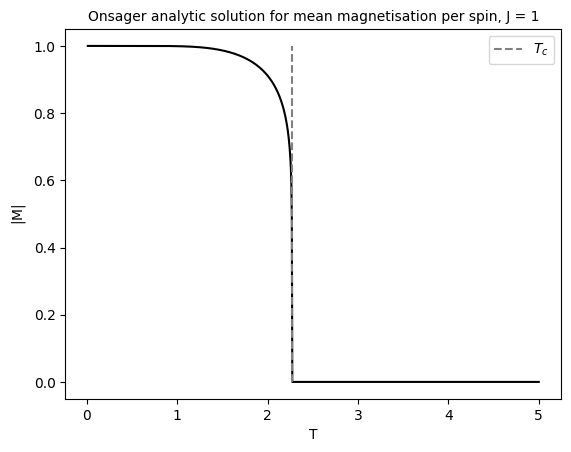

In [6]:
# Plot Onsager solution, J = 1:
J = 1
Ts_analytic = np.linspace(0.01,5,1000)
T_c = 2*J/np.log(1 + np.sqrt(2)) # Critical temperature

# Construct absolute magnetism:
M_analytic = []

for T in Ts_analytic:
    if T < T_c:
        M_analytic.append(np.power(1 - np.power(np.sinh(2*J/T),-4),1/8))
    else:
        M_analytic.append(0)

# Plot:
plt.plot(Ts_analytic, M_analytic, color = 'black')
plt.plot(np.full((5,1),T_c), np.linspace(0,1,5), linestyle = '--', color = 'gray', label = r'$T_c$')
plt.xlabel('T')
plt.ylabel(r'$\vert$M$\vert$')
plt.title('Onsager analytic solution for mean magnetisation per spin, J = ' + str(J), fontsize = 10)
plt.legend()
plt.show()

*Fig. 1 - mean magnetisation per spin against temperature for the Onsager solution.*

It is important to note that $T_c$ changes for finite size lattices according to the relationship:

$T_c(L) = T_c(\infty) +  \alpha L^{-1/\nu}$[6]

Where $T_c(L)$ is known as the pseudocritical temperature.

It is also expected that, for finite lattices that there will be a 'smoothing out' of the Onsager solution. This must be calculated directly using equation 3, and hence requires summing over every possible state in the system, which is infeasible for even small lattice due to the $2^N$ possible states. To illustrate this, analytic solutions for magnetism against temperature are obtained by exhaustion for the $2 \times 2$ case:

# TO DO

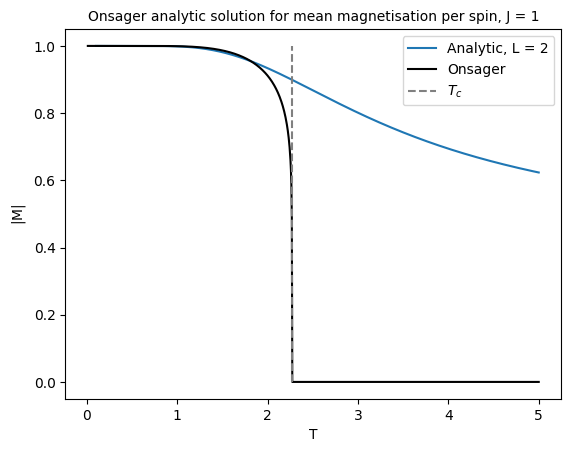

In [155]:
Ts = np.linspace(0.1,5,1000)
Ms = []
for T in Ts:
    Ms.append(0.25*(8*np.exp(8*T**-1)+16)/(2*np.exp(8*T**-1)+12+2*np.exp(-8*T**-1)))

plt.plot(Ts,Ms, label = 'Analytic, L = 2')
plt.plot(Ts_analytic, M_analytic, color = 'black', label = 'Onsager')
plt.plot(np.full((5,1),T_c), np.linspace(0,1,5), linestyle = '--', color = 'gray', label = r'$T_c$')
plt.xlabel('T')
plt.ylabel(r'$\vert$M$\vert$')
plt.title('Onsager analytic solution for mean magnetisation per spin, J = ' + str(J), fontsize = 10)
plt.legend()
plt.show()

### 2 - Markov Chain Monte Carlo

The two algorithms investigated are variations of a Markov Chain Monte Carlo (MCMC) method, that approach and evolve the desired physical state. Direct sampling Monte Carlo, while simpler, would require individually producing each state $X_i$. This is infeasibly slow. Instead, we use the MCMC methods, which produce a state $X_{i + 1}$ from an alteration of the $X_i$ state. One of the downsides of the MCMC methods is that this means consecutive states are not independent. This is quantified by the sample autocorrelation, discussed in more detail in section 4.

The MCMC starts with some initial state, $x_0$, and a state $x_{i+1}$ is produced from a state $x_i$ with a transition probability $p(x_{i + 1} \vert x_{i})$. Therefore the the chance of a particular sequence of states from $x_0$ to $x_n$ is:

$p_{path}(x_0 \rightarrow x_n) = p(x_0)\prod_{i = 0}^n p(x_{i + 1} \vert x_{i})$ (8)

*(This assumes that our markov chain is time homogenous, i.e. the chance of the transition $i \rightarrow j$ is irrelevant of the step in which the transition occurs)*

Suppose now we wish to simply find the chance of arriving at the state $x_n$ in $n$ steps, $p^{(n)}(x)$, regardless of path. Naively, this would involve summing over every singly possible path to every single possible final value to get the full distribution.

This can also be represented as taking a vector $\overrightarrow{p}^{(1)}$ whose $j^{th}$ element is $p^{(1)}(j)$ and acting on it $n-1$ times with a matrix $\textbf{P}$, with elements $\textbf{P}_{ij} = p(i \vert j)$:

$ \overrightarrow{p^{(n)}} = \textbf{P}^{n-1} \overrightarrow{p^{(1)}} $ (9)

For physical systems that reach equilibrium, we expect that, as $ n \rightarrow \infty$, our state vector will approach an unchanging distribution. This is called the *stationary distribution* and is commonly represented with $\pi$. As this stationary distribution does not change, trivially:

$ \pi\textbf{P} = \pi$ (10)

To implement MCMC algorithms, one must look for a method to find the transition matrix, $\textbf{P}$, from the intended stationary distribution. However, for complicated systems such as the Ising model studied here, $\pi$ cannot be analytically calculated and supplied. Therefore a different approach is required.

Firstly, note that our energy equation above is time-reversal symmetric as is the system, hence the probability of $i \rightarrow j$ is equal to the probability $j \rightarrow i$ for a step in the markov chain.

From this follows:

$ \pi_j\textbf{P}_{jk} = \pi_k = \textbf{P}_{jk}\pi_k $ (11)

using the eigenvector property of $\pi$ additionally. This constraint is known as *detailed balance*, and enables the use of simpler distributions to converge on the static distribution.

To approach this, each element of $\textbf{P}$ is split into a proposal probability distribution, $p_prop(j \vert k)$, that gives the chance of attempting to reach state $k$ from $j$, and an acceptance distribution, $p_{acc}(j \rightarrow k)$, that gives the chance of the change of state being accepted:

$ p( j \vert k) = p_{acc}(j \rightarrow k) p_{prop}(j \vert k) $ (12)

With the detailed balance condition, this results in the condition:

$\frac{p_{acc}(j \rightarrow k)}{p_{acc}(k \rightarrow j)} = \frac{\pi_k}{\pi_j} \frac{p_{prop}(j \vert k)}{p_{prop}(k \vert j)} $ (13)

A $p_{acc}$ is sought that satisfies this constraint.

### 3 - The Metropolis-Hastings algorithm

The Metropolis-Hasting (MH) algorithm follows the above logic, and the choice of $p_{acc}$ is:

$p_{acc}(j \rightarrow k) = min(1,\frac{\pi_k}{\pi_j} \frac{p_{prop}(j \vert k)}{p_{prop}(k \vert j)})$ (14)

The general MH algorithm proceeds as follows from a starting state $j$:

1. From an initial state $j$, pick a new state $k$ in line with the $p_{prop}$ distribution.
2. Accept the transition to $k$ with probability $p_{acc}(j \rightarrow k)$, and move to state $k$, or reject the move (with probability $ 1 - p_{acc}(j \rightarrow k )$) and remain in state $j$.
3. Return to 1.

This algorithm does not have a defined end point, so the end point is determined in this report by a predetermined number of iterations. This can be defined more rigorously later on, through utilisation of the autocorrelation time, $\tau_f$. Independent samples are generally considered to have occured every $\sim 2 \tau_f$, hence the number of total iterations can be varied, but should be several $\tau_f$.[8]

To apply this to the Ising model, states $j, k, etc.$ are taken to be unique arrangements of spins in the lattice. This means for a lattice containing $N$ spins, there are have $2^N$ possible states. New states $k$ are generated by choosing a random spin in $j$ and flipping it. The spin to flip is chosen from a uniform random distribution, hence $p_{prop}(k \vert j) = \frac{1}{N}$. The sought stationary distributions is equation (4), combining this with (11):

$p_{acc}(j \rightarrow k) = min(1, \frac{e^{-\beta E_k}}{e^{- \beta E_j}}) = min(1, e^{-\beta \Delta E})$ (15)

Notice that the partition function, $Z$, is not a dependent of $p_{acc}$, as it is cancelled in the ratio $\frac{\pi_k}{\pi_j}$.

From equation (1),

$\Delta E = 2 J \sigma_i \sum_j \sigma_j + 2 \mu H \sigma_i  $ (16) [2]

For the flip of a spin at a location $i$, with near neighbours $j$

This algorithm is easy to implement, but has a few shortcomings. Firstly, about the critical temperature, $T_c$, where the lattice undergoes a sharp change in behaviour, the MH algorithm displays an inherent issue of critical slowing down - the lattice has global behaviour which cannot be captured in flipping a single spin, and hence many iterations are required to reach a reliable stationary distribution.

MH also has some intrinisic properties. Firstly, it is a completely general MCMC technique that can be applied to most statistical physics problems, for example it is also applicable to the hard disk crystal model [2]. Additionally, MH can quite easily be parallelised to allow for faster computation. The implementation of MH used in this report is included in the GitHub repository as *MH_algorithm.py*

### 4 - The Wolff Cluster algorithm

The Wolff cluster algorithm is a separate algorithm used for the Ising model. It seeks to reach the stationary distribution quicker, and mitigate the issue of critical slowing down by forming clusters of like spins within the lattice and attempting to flip them all at once. This allows it to reach likely states that are significantly different from the current state in many fewer iterations by flipping a large number of spins together in each iteration. This algorithm as applied to the Ising model proceeds as follows:

1. A random site in the lattice $i$ with spin $\sigma_i$ is picked and added to the cluster.
2. Each neighbour of $i$ that also has spin $\sigma_i$, is added to the cluster with probability $1- e^{-2 \beta J}$.
3. Repeat step 2 for each neighbour added to the cluster until no more spins are added to the cluster.
4. Now that the cluster is defined flip each spin in the cluster and return to step 1. [3]

This is a rejection free algorithm, which means that in each iteration at least one spin is flipped and the state is changed. Therefore, this algorithm will display (usually small) fluctuations about equilibrium, whereas the MH algorithm will not necessarily.

The Wolff algorithm as outlined above is specific to the Ising model and cannot be applied to other problems that require an MCMC approach. This is a major disadvantage in comparison to the MH algorithm. It can be parrallelised like the MH algorithm [4]. The implementation of Wolff used in this report is included in the GitHub repository as *Wolff_algorithm.py*.

### 5 - Autocorrelation and quantification of critical slowing down

In order to investigate the feasability and scaling of these algorithms, an estimate of the number of iterations needed between independent samples of the lattice are needed. It is generally considered that an independent sample can be taken every $\sim 2\tau_f$ iterations, where $\tau_f$ is the autocorrelation time, and it can be estimated as follows:

To estimate the autocorrelation time, the *sample autocorrelation*, $\bar\rho(t)$ is required:

$\bar\rho(t) = \frac{\bar\gamma(t)}{\bar\gamma(0)}$ (17)

Where $\bar\gamma(t)$ is the *sample autocovariance*, defined below:

$\bar\gamma(t) = \frac{1}{n-t}\sum_{i=1}^{n-t}(f(X_i)-\bar f(X))(f(X_{i+t})-\bar f(X))$ (18)

This sample autocorrelation is a convenient measure of the degree of correlation of the observable $f$ on state $X_t$ at time $t$ with other states in the chain. To determine autocorrelation time, it is assumed that $\bar\rho(t)$ decays exponentially, with the characteristic decay scale of the autocorrelation time, $\tau_f$:

$\bar\rho(t) \approx e^{{t}/{\tau_f}}$ (19) [5]

Under this assumption, the autocorrelation time is estimated by the time of the first value of $\bar\rho(t)$ such that $\bar\rho(t) \le \frac{1}{e}$. It is also important to note that the autocorrelation time will be different for different variables.

If $M$ states have been generated in a simulation, there are roughly $\frac{M}{2\tau_f}$ independent samples generated. This shows that for a larger autocorrelation time, a smaller number of independent samples can be collected, and more iterations are needed. Therefore,the interations required to take a representative average of an observable becomes much larger. This is *slowing down* of the algorithm.

The Ising model has critical exponents, similar to many thermodynamic systems that display a phase transition. As $T \rightarrow T_c$, these can be used to describe the behaviour of observables using simple power laws.

$\xi \sim \vert T - T_c \vert ^{-\nu}$

$\tau_f \sim \vert T - T_c \vert ^{-\nu z}$ [7]

where $\xi$ is the correlation length of the lattice, and $\nu$ is one of the critical exponents of the Ising model. In two dimensions, $\nu = 1$ [10]. Note that critical exponents are a universal property of the model and do not change between algorithms. $z$ is the *dynamic exponent* and does vary between algorithms. Clearly, near the critical temperature the autocorrelation time for our algorithms is expected to be very large, and collecting independent samples quickly becomes infeasible. This is *critical slowing down* and presents a significant challenge to the computational investigation of the system with these methods.

For an infinite lattice near $T_c$, $\xi$ will diverge towwards infinity, as the lattice displays fluctuations on all scales. However, for finite lattices this is not possible. Therefore, near $T_c$, $\xi \sim L$ where $L$ is the lattice width. Using this, in the critical regime:

$\tau_f \sim L ^{z}$

$ln(\tau_f) \sim zln(L)$

This describes the finite scaling of the algorithm. Any algorithm with a positive dynamic exponent will display the issue of critical slowing down. The magnitude of $z$ determines the severity in terms of iterations. A method with a smaller dynamic exponent will take many fewer iterations per independent sample, and hence will be a more feasible method for large lattices, even if the CPU time for a single iteration is much longer.

## Investigation

### 1 - Qualitative investigation of the lattice evolution

As a first test of the MH and Wolff algorithms, A $N \times N$ lattice is evolved 